In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('FinalDataset.csv')

In [4]:
data.head()

,Unnamed: 0,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1


In [6]:
data['date_parsed']

0       2012-04-11
1       2012-04-12
2       2012-04-13
3       2012-04-16
4       2012-04-17
           ...    
1632    2018-10-25
1633    2018-10-26
1634    2018-10-29
1635    2018-10-30
1636    2018-10-31
Name: date_parsed, Length: 1637, dtype: object

In [7]:
#Parsing date

data['date_parsed'] = pd.to_datetime(data['date_parsed'],format="%Y-%m-%d")
data['date_parsed']

0      2012-04-11
1      2012-04-12
2      2012-04-13
3      2012-04-16
4      2012-04-17
          ...    
1632   2018-10-25
1633   2018-10-26
1634   2018-10-29
1635   2018-10-30
1636   2018-10-31
Name: date_parsed, Length: 1637, dtype: datetime64[ns]

## Assign the dependent and independent features into different variable.

Dependent Feature - target_variable

Independent Feature - open, high, low, close, volume, cont_len, cont_pol, date_parsed, date_year, date_month, date_day, sent_neg, sent_neu, sent_pos

In [8]:
X = data.loc[:, ['open', 'high', 'low', 'close', 'volume', 'cont_len', 
       'date_year', 'date_month', 'date_day',
       'sent_neg', 'sent_neu', 'sent_pos']]
X.head()

,open,high,low,close,volume,cont_len,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
0,1358.98,1374.71,1358.98,1368.70,593003200.0,108.142857,2012,4,11,0,0,1
1,1368.77,1388.13,1368.77,1387.56,547368832.0,75.000000,2012,4,12,0,0,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,73.000000,2012,4,13,0,1,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,188.500000,2012,4,16,0,0,1
4,1369.57,1392.76,1369.57,1390.78,566529216.0,235.529412,2012,4,17,0,0,1


In [9]:
y = data.loc[:,'target_variable']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: target_variable, dtype: int64

In [10]:
y.value_counts()

1    885
0    752
Name: target_variable, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
X_train 

,open,high,low,close,volume,cont_len,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
63,1341.29,1341.29,1325.41,1334.76,611763776.0,191.522727,2012,7,12,0,0,1
1316,2479.97,2481.69,2474.94,2477.83,546161216.0,104.382250,2017,7,26,0,0,1
1018,2044.21,2044.21,2025.91,2040.04,595418112.0,110.114978,2016,5,19,0,0,1
1046,2042.69,2073.13,2042.69,2070.77,700682624.0,117.689339,2016,6,29,0,0,1
1149,2198.55,2204.72,2194.51,2204.72,526711808.0,91.136364,2016,11,23,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2144.06,2147.13,2132.52,2133.04,619899264.0,108.791023,2016,10,27,0,0,1
1294,2434.65,2441.40,2431.11,2438.30,820550304.0,98.818429,2017,6,23,0,0,1
860,1921.77,1951.36,1893.70,1951.36,785596224.0,149.716981,2015,10,2,0,0,1
1459,2722.99,2737.60,2706.76,2716.26,571354624.0,86.885911,2018,2,20,0,0,1


In [13]:
X_test

,open,high,low,close,volume,cont_len,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
677,2046.13,2049.30,2022.58,2028.26,543538944.0,153.702703,2015,1,12,0,0,1
1589,2862.35,2876.16,2862.35,2874.69,425807424.0,97.498827,2018,8,24,0,0,1
984,2056.62,2075.07,2043.98,2072.78,666015104.0,125.892350,2016,4,1,0,0,1
607,1971.44,1971.44,1941.72,1946.16,612042368.0,162.156863,2014,10,1,0,0,1
1392,2580.18,2583.81,2575.57,2582.30,514540512.0,98.768220,2017,11,10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2431.24,2433.15,2422.88,2433.15,820550304.0,102.826122,2017,6,16,0,0,1
306,1696.63,1698.78,1691.13,1692.39,459706016.0,117.416667,2013,7,23,0,0,1
192,1501.96,1504.19,1496.76,1498.11,740722880.0,139.823529,2013,1,31,0,0,1
309,1687.31,1691.85,1676.03,1691.65,466156032.0,114.176471,2013,7,26,1,0,0


In [14]:
y_train

63      0
1316    1
1018    0
1046    1
1149    1
       ..
1130    0
1294    1
860     1
1459    0
1126    0
Name: target_variable, Length: 1309, dtype: int64

Scaling:

1. Even after removing all the outliers we can see our data has varying scales.
2. We saw in EDA that our data has Gaussian (Normal) Distribution.
\
So, 
lets do standardization before going for Logistic Regression.




In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = log_reg.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

## Calculate the differences between y_train and y_train'

In [18]:
score1 = log_reg.score(X_train, y_train)
print('The differences between actual y_train and trained y_train seems to be ', score1)

The differences between actual y_train and trained y_train seems to be  0.6875477463712758


## Calculate the differences between y_pred and y_test

In [19]:
score2 = log_reg.score(X_test, y_test)
print('The differences between actual y_test and trained y_pred seems to be ', score2)

The differences between actual y_test and trained y_pred seems to be  0.676829268292683


# Evaluation metrics

Since, our project is a classification problem.Let's get the classification report, accuracy and confusion matrix.

In [20]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = log_reg.predict(X_test)
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)
acc_score_per = acc_score * 100
print('The accuracy score is ', acc_score, '/', acc_score_per , '%.')

              precision    recall  f1-score   support

           0       0.83      0.43      0.57       161
           1       0.62      0.92      0.74       167

    accuracy                           0.68       328
   macro avg       0.73      0.67      0.65       328
weighted avg       0.73      0.68      0.66       328

The accuracy score is  0.676829268292683 / 67.6829268292683 %.


## Confusion Matrix

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 69,  92],
       [ 14, 153]])

### Let's see the value of Confusion matrix details via Heatmap.

Text(30.5, 0.5, 'True Label')

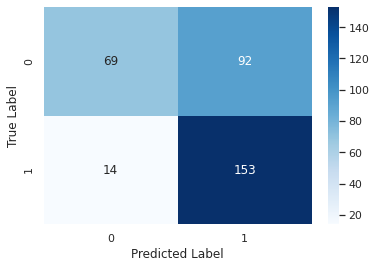

In [22]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### Summary:

True Negative: 68
\
False Positive: 93
\
False Negative: 12
\
True Positive: 155


## Reciever Operating Characteristics Curve (ROC Curve)

It plots the graph of the False Positive Rate (x-axis) vs the True positive rate (Y-axis).
\
Let's see the performance of our Classification model at all classification thresholds (0-1).

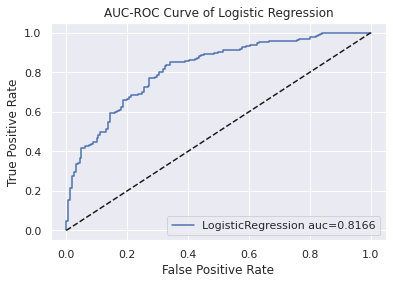

The ROC score is  0.8166400119016626 / 81.66400119016626 %.


In [23]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr_log,tpr_log,_ =roc_curve(y_test, pred_prob)
roc_score = roc_auc_score(y_test, pred_prob)
roc_score_per = roc_score * 100

plt.plot(fpr_log,tpr_log,label = 'LogisticRegression auc={:.4f}'.format(roc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of Logistic Regression')
plt.legend(loc=4)
plt.show()

print('The ROC score is ', roc_score, '/', roc_score_per , '%.')


## Summary:

The left corner of our model is quite near to top-left corner but not exactly so the roc curve of our model is average.
\
In general AUC of 0.8-0.9 is considered good but above 0.9 is considered excellent.
\
And also our accuracy score for model is not that good so let's try some Hyperparameter tuning.

# Hyperparameter Tuning

There are various different methods for Hyperparameter Tuning But we don't have that great number of independent features so we'll choose GridSearchCV for hyperparameter tuning for our model. 
\
Most of the variables in algorithms cannot be changed (parameters) but we can change few parameterss (Hyperparameters) to tune our Logistic Regression model like:

    1. estimator: In this we have to pass the models or functions on which we want to use GridSearchCV
    2. param_grid: Dictionary or list of parameters of models or function in which GridSearchCV have to select the best.
    3. Scoring: It is used as a evaluating metric for the model performance to decide the best hyperparameters, if not especified then it uses estimator score.
    4. cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
    5. n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.


In [24]:
from sklearn.model_selection import GridSearchCV

#Penalty for handling the overfitting and underfitting
penalty=['l1', 'l2', 'elasticnet']
#Algorithm to use in the optimization problem.
solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#Maximum number of iterations taken for the solvers to converge
max_iter=[100,200,300,350]

In [25]:
#creating a random grid
random_grid={'penalty':penalty,
             'solver':solver,
             'max_iter':max_iter,
             }

In [26]:
# Cross validation - 20
log_reg_grid_search= GridSearchCV(estimator=log_reg, param_grid=random_grid, cv=20, n_jobs=-1, verbose=2)

In [27]:
log_reg_grid_search.fit(X_train,y_train)

Fitting 20 folds for each of 60 candidates, totalling 1200 fits


GridSearchCV(cv=20, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'max_iter': [100, 200, 300, 350],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [28]:
log_reg_grid_search.best_params_


{'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [29]:
score1 = log_reg_grid_search.score(X_train, y_train)
print('The differences between actual y_train and trained y_train seems to be ', score1)

score2 = log_reg_grid_search.score(X_test, y_test)
print('The differences between actual y_test and trained y_pred seems to be ', score2)

The differences between actual y_train and trained y_train seems to be  0.894576012223071
The differences between actual y_test and trained y_pred seems to be  0.9390243902439024


In [30]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = log_reg_grid_search.predict(X_test)
print(classification_report(y_test,y_pred))
acc_score = accuracy_score(y_test,y_pred)
acc_score_per = acc_score * 100
print('The accuracy score is ', acc_score, '/', acc_score_per , '%.')

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       161
           1       0.92      0.96      0.94       167

    accuracy                           0.94       328
   macro avg       0.94      0.94      0.94       328
weighted avg       0.94      0.94      0.94       328

The accuracy score is  0.9390243902439024 / 93.90243902439023 %.


## Summary:

Accuracy score:

Before Hyperparameter tuning: 0.6798780487804879 / 67.98780487804879 %.
\
After Hyperparameter tunign: 0.9390243902439024 / 93.90243902439023 %.

Hence, we can see how our accuracy has gradually changed after Hyperparameter tuning. 

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[148,  13],
       [  7, 160]])

Text(30.5, 0.5, 'True Label')

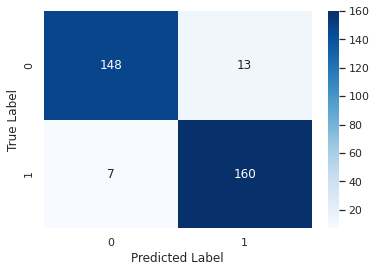

In [32]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

### Summary:

True Negative: 148 (Before Hyperparameter Tuning: 68)
\
False Positive: 13 (Before Hyperparameter Tuning: 93)
\
False Negative: 7 (Before Hyperparameter Tuning: 12)
\
True Positive: 160 (Before Hyperparameter Tuning: 155)

Hence, we can say our model is doing great after hyperparameter tuning.


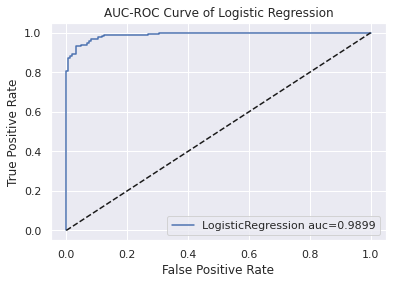

The AUC is  0.9899207795588946 / 98.99207795588946 %.


In [33]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

pred_prob = log_reg_grid_search.predict_proba(X_test)[::,1]
fpr_log,tpr_log,_ =roc_curve(y_test, pred_prob)
roc_score = roc_auc_score(y_test, pred_prob)
roc_score_per = roc_score * 100

plt.plot(fpr_log,tpr_log,label = 'LogisticRegression auc={:.4f}'.format(roc_score))
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve of Logistic Regression')
plt.legend(loc=4)
plt.show()

print('The AUC is ', roc_score, '/', roc_score_per , '%.')


# Summary:

1. The AUC score is  0.98988358686354 / 98.988358686354 % (AUC value about 0.9 is considered outstanding). Hence 
model has satisfying AUC score.
2. From the curve also we can see, the line is so close to top-left corner. Hence, our model is really good.

In [34]:
data.rename(columns = {'open':'open_price'}, inplace = True)
data

,open_price,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2674.88,2722.70,2667.84,2705.57,767958464.0,2018-10-25,89.500580,0.04,Positive,2018,10,25,0,0,1,1
1633,2667.86,2692.38,2628.16,2658.69,820550304.0,2018-10-26,90.076709,0.04,Positive,2018,10,26,0,0,1,0
1634,2682.65,2706.85,2603.54,2641.25,778263680.0,2018-10-29,98.429104,0.03,Positive,2018,10,29,0,0,1,0
1635,2640.68,2685.43,2635.34,2682.63,820550304.0,2018-10-30,95.842273,0.03,Positive,2018,10,30,0,0,1,1


# Pickling

In [35]:
import pickle
# Open a file, where you want to store the data
file = open('stock_log_reg.pkl', 'wb')

# Dump information to that file
pickle.dump(log_reg_grid_search, file)